<a href="https://colab.research.google.com/github/maharaniramadani/pelatihan/blob/main/machinetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library**

In [39]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
# Library for cleaning text
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory # For removing stopword
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # For stemming the word

# Library for model making
from sklearn.model_selection import train_test_split # For splitting the data
from sklearn.feature_extraction.text import TfidfVectorizer # For doing the TFIDF, see https://en.wikipedia.org/wiki/Tf%E2%80%93idf
from sklearn.naive_bayes import MultinomialNB # The Naive Bayes model
from sklearn.svm import SVC # The Support Vector Machine model
from sklearn.metrics import classification_report, f1_score, accuracy_score # For evaluate the model performance
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Library for text preprocessing
import nltk

# Library for progress bar
from tqdm import tqdm

import pandas as pd
import numpy as np

# Library for text manipulation
import string
import re

# Download the punctuation data
nltk.download('punkt')

# To make panda have progressbar
tqdm.pandas()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Review the data**

In [41]:
# Open the data file
df = pd.read_excel('/content/datafix.xlsx')

# View top 5 data
df.head()

,Komentar,Label
0,Saya nonton ini setelah nonton filmnya. Jadi ...,2
1,Adegan favorit sejauh ini pas Yohan mengakui ...,2
2,sumpah ya nonton CTS 2 ini kayak lagi nonton ...,2
3,Udah nonton CTS 2 ketawa nangis deg2an melebu...,2
4,Baru minggu lalu nonton ini bareng suami dan ...,2


In [42]:
# Get the only data we need (text and the label)
df = df[['Komentar', 'Label']]

# # Rename the column for easier use with .rename(columns={Before name : After name}, inplace is for changing the main data)
# df.rename(columns={'Review' : 'text'}, inplace=True)

# Check the top 5 data with .head() function
df.head()

,Komentar,Label
0,Saya nonton ini setelah nonton filmnya. Jadi ...,2
1,Adegan favorit sejauh ini pas Yohan mengakui ...,2
2,sumpah ya nonton CTS 2 ini kayak lagi nonton ...,2
3,Udah nonton CTS 2 ketawa nangis deg2an melebu...,2
4,Baru minggu lalu nonton ini bareng suami dan ...,2


In [43]:
# Check if there's any null/none data with .isna() function and total it with .sum()
df.isna().sum()

Komentar    0
Label       0
dtype: int64

In [44]:
# Drop the null data with .dropna()
df = df.dropna()

# Check if there's still any null data
df.isna().sum()

Komentar    0
Label       0
dtype: int64

In [45]:
# Check the data shape
df.shape

(800, 2)

In [46]:
# Changing the data type in the label as int (before is float)
df['Label'] = df['Label'].astype('int64')

# Check the data again
df.head()

,Komentar,Label
0,Saya nonton ini setelah nonton filmnya. Jadi ...,2
1,Adegan favorit sejauh ini pas Yohan mengakui ...,2
2,sumpah ya nonton CTS 2 ini kayak lagi nonton ...,2
3,Udah nonton CTS 2 ketawa nangis deg2an melebu...,2
4,Baru minggu lalu nonton ini bareng suami dan ...,2


# **Text preprocessing**

What we do and why we do it ?

1. Case fold the text to make the text all similar because 'Aku' and 'aku' will have different token if we didn't make it equal
2. Remove the punctuation because punctuation is a noise in the text
3. If we check the text data, there is **NON ASCII** word like 'ðŸ˜'. This thing clearly a noise in the text, so we should remove it
4. Remove any number in the text (optional)
5. Remove the word that doesn't have any meaning like 'dan', 'si', etc
6. Stem the word to make the word easier to understand and remove any word that have the same meaning like 'makanan' and 'makan'

In [47]:
# Creating the stemmer object to help stemming process
factory_stem = StemmerFactory()
stemmer = factory_stem.create_stemmer()

# Creating the stop word remover object to help remove the stopword
factory_stop = StopWordRemoverFactory()
stopword = factory_stop.create_stop_word_remover()

In [48]:
# The main function for preprocessing, combine all the steps into 1 fucntion
def preprocessing(text):
    case_text = text.lower() # Case Folding

    punct_text = case_text.translate(str.maketrans('', '', string.punctuation)) # Remove punct

    ascii_text = re.sub(r'[^\x00-\x7F]', '', punct_text) # Remove non-ascii

    numb_text = re.sub(r"\d+", "", ascii_text) # Remove number

    stop_text = stopword.remove(numb_text) # Remove stopword

    stemd_text = stemmer.stem(stop_text) # Remove stemmed word

    return stemd_text

# # Then we try the function
# text = 'mie ayam babi rasanya enak sekali, miyabi enak'
# print(preprocessing(text))

In [49]:
# After that we apply the function to the data and make a new column to compare before after using .progress_apply() with lambda function
df['cleaned_text'] = df['Komentar'].progress_apply(lambda x : preprocessing(x))

# Check the data
df.head()

100%|██████████| 800/800 [02:51<00:00,  4.66it/s]


,Komentar,Label,cleaned_text
0,Saya nonton ini setelah nonton filmnya. Jadi ...,2,nonton telah nonton film jadi happy krn lebih ...
1,Adegan favorit sejauh ini pas Yohan mengakui ...,2,adegan favorit jauh pas yohan aku takut lihat ...
2,sumpah ya nonton CTS 2 ini kayak lagi nonton ...,2,sumpah nonton cts kayak nonton hidup gue sendi...
3,Udah nonton CTS 2 ketawa nangis deg2an melebu...,2,udah nonton cts ketawa nang degan lebur jadi s...
4,Baru minggu lalu nonton ini bareng suami dan ...,2,baru minggu lalu nonton bareng suami rasa waki...


In [50]:
df.tail()

,Komentar,Label,cleaned_text
795,jelek,1,jelek
796,jelek,1,jelek
797,jelek,1,jelek
798,jelek,1,jelek
799,jelek,1,jelek


Text(0.5, 1.02, 'komentar positif dan negatif')

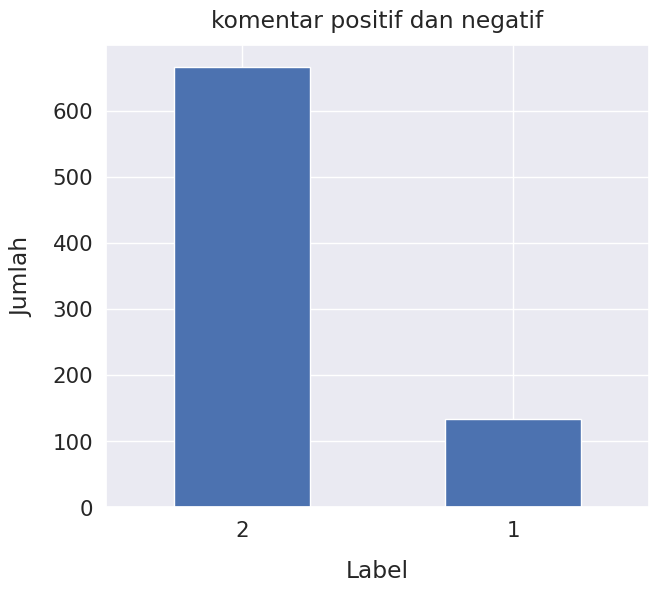

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(font_scale=1.4)
df['Label'].value_counts().plot(kind='bar', figsize=(7,6), rot=0)
plt.xlabel("Label", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("komentar positif dan negatif", y=1.02)

# **Model building**

In [52]:
# Split the data with 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['Label'], test_size=0.2)

In [53]:
# What is TFIDF you say ? check the link i gave you before. So we make the TFIDF object to transform our data
tfd = TfidfVectorizer()

# But first we need to 'fit' the TFIDF transformer to have the vocab off all the word we have using the cleaned text
tfd.fit(df['cleaned_text'])

# Then we transform all the other data to make it 'vectorize'
X_train_tfd = tfd.transform(X_train)
X_test_tfd = tfd.transform(X_test)

# Check the vocabulary of the tfd object
tfd.vocabulary_

{'nonton': 1412,
 'telah': 1962,
 'film': 579,
 'jadi': 814,
 'happy': 708,
 'krn': 1049,
 'lebih': 1100,
 'gampang': 616,
 'nyatuinnya': 1449,
 'stlh': 1884,
 'tau': 1946,
 'hasil': 717,
 'bts': 316,
 'nya': 1435,
 'keren': 973,
 'banget': 171,
 'ernest': 551,
 'meira': 1207,
 'spt': 1873,
 'yg': 2151,
 'sudah': 1894,
 'selalu': 1752,
 'isi': 803,
 'pulang': 1607,
 'bawa': 208,
 'makna': 1157,
 'kali': 892,
 'buat': 319,
 'gue': 686,
 'bgt': 259,
 'bikin': 271,
 'ketawa': 988,
 'saat': 1664,
 'air': 42,
 'mata': 1192,
 'ngalir': 1352,
 'pipi': 1564,
 'segitu': 1740,
 'pindah': 1561,
 'emosi': 536,
 'cakeeeeppp': 339,
 'adegan': 20,
 'favorit': 569,
 'jauh': 828,
 'pas': 1509,
 'yohan': 2152,
 'aku': 60,
 'takut': 1929,
 'lihat': 1115,
 'sarah': 1696,
 'darah': 425,
 'ayu': 136,
 'dalem': 416,
 'rasa': 1623,
 'sayang': 1706,
 'beneran': 231,
 'murni': 1298,
 'dalam': 414,
 'sumpah': 1903,
 'cts': 397,
 'kayak': 929,
 'hidup': 737,
 'sendiri': 1777,
 'isu': 807,
 'masalah': 1179,
 'dram

**Support Vector Machine**

In [54]:
# Creating the SVM model, there is a lot of parameter you can use in this function please read the documentation here
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
model_svm = SVC()

# We literally train the model here with the transformed data and the label
model_svm.fit(X_train_tfd, y_train)

SVC()

In [55]:
# Then we predict the model with the test data
svm_pred = model_svm.predict(X_test_tfd)

In [56]:
# Evaluation
# As always explore to know more
# https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce

print("Confusion Matrix : \n{}".format(confusion_matrix(y_test, svm_pred)))

# We check the classification report
print('Classification Report : \n{}'.format(classification_report(y_test, svm_pred)))

# We check the acc of the model
print('Accuracy : {}%'.format(round(accuracy_score(y_test, svm_pred) * 100)))

# F1-score is the best metrics to tell how your model perform
print('F1 Score : {}%'.format(round(f1_score(y_test, svm_pred) * 100)))

Confusion Matrix : 
[[ 17   8]
 [  0 135]]
Classification Report : 
              precision    recall  f1-score   support

           1       1.00      0.68      0.81        25
           2       0.94      1.00      0.97       135

    accuracy                           0.95       160
   macro avg       0.97      0.84      0.89       160
weighted avg       0.95      0.95      0.95       160

Accuracy : 95%
F1 Score : 81%


**Multinomial Naive Bayes**

In [57]:
# Creating MNB model, there is a lot of paramter here but i didn't use any
# See here https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
model_mnb = MultinomialNB()

# Train the model just like we do before
model_mnb.fit(X_train_tfd, y_train)

MultinomialNB()

In [58]:
# Predict the test data using the MNB model
mnb_pred = model_mnb.predict(X_test_tfd)

In [59]:
# Evaluation

print("Confusion Matrix : \n{}".format(confusion_matrix(y_test, mnb_pred)))
# We check the classification report
print('Classification Report : \n{}'.format(classification_report(y_test, mnb_pred)))

# We check the acc of the model
print('Accuracy : {}%'.format(round(accuracy_score(y_test, mnb_pred) * 100)))

# F1-score is the best metrics to tell how your model perform
print('F1 Score : {}%'.format(round(f1_score(y_test, mnb_pred) * 100)))


Confusion Matrix : 
[[ 15  10]
 [  0 135]]
Classification Report : 
              precision    recall  f1-score   support

           1       1.00      0.60      0.75        25
           2       0.93      1.00      0.96       135

    accuracy                           0.94       160
   macro avg       0.97      0.80      0.86       160
weighted avg       0.94      0.94      0.93       160

Accuracy : 94%
F1 Score : 75%


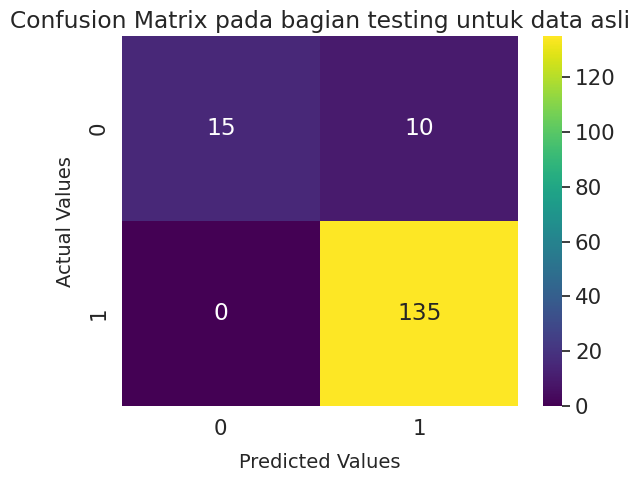

In [60]:
sns.heatmap(confusion_matrix(y_test, mnb_pred),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# **Real world test**

We check how good our model perform in the real world example. I make my own text and you guys can change it too

In [61]:
# Positive text
text1 = 'barangnya bagus sekali ya saya suka dengan barang ini'

# We can't just put our text the model without any preprocessing, we need to preprocess it first before we can use our text
prep_text1 = preprocessing(text1)

# TFIDF transformer only accept list so make we make it 'list' first
tfd_text1 = tfd.transform([prep_text1])

In [62]:
# We predict the text with the model that we train before

print('SVM Model predicted that this is a {} text'.format('Positive' if model_svm.predict(tfd_text1)[0] == 1 else 'Negative'))
print('MNB Model predicted that this is a {} text'.format('Positive' if model_mnb.predict(tfd_text1)[0] == 1 else 'Negative'))

SVM Model predicted that this is a Negative text
MNB Model predicted that this is a Negative text


In [63]:
# Negative text
text2 = 'barangnya jelek saya tidak sukak dengan barang sejelek ini'

# Same as the above
prep_text2 = preprocessing(text2)

# Same as the above
tfd_text2 = tfd.transform([prep_text2])

In [64]:
print('SVM Model predicted that this is a {} text'.format('Positive' if model_svm.predict(tfd_text2)[0] == 1 else 'Negative'))
print('MNB Model predicted that this is a {} text'.format('Positive' if model_mnb.predict(tfd_text2)[0] == 1 else 'Negative'))

SVM Model predicted that this is a Positive text
MNB Model predicted that this is a Positive text


# **Final note**

You can change the text, preprocessing method, or use any other model with the same algorithm like this. Please try to experiment using the model and do some tuning to make it better.